# Introduction

In this notebook we demonstrate the use of a **Customized Word Embedding (Word2Vec)** DL technique to make trace link recovery between System Features and Bug Reports.

We model our study as follows:

* Each bug report title, summary and description compose a single query.
* We use each test case content as an entire document that must be returned to the query made

# Import Libraries

In [1]:
from mod_finder_util import mod_finder_util
mod_finder_util.add_modules_origin_search_path()

import pandas as pd
import numpy as np
import pprint

from modules.models_runner.feat_br_models_runner import Feat_BR_Models_Runner
from modules.utils import aux_functions
from modules.utils import model_evaluator as m_eval
from modules.utils import firefox_dataset_p2 as fd
from modules.utils import similarity_measures as sm
from modules.utils import br_feat_final_matrix_handler as b2f_handler

from matplotlib import pyplot as plt

import warnings; warnings.simplefilter('ignore')

# Load Datasets

In [2]:
bugreports = fd.Datasets.read_selected_bugreports_df()
features = fd.Datasets.read_features_df()

SelectedBugReports.shape: (91, 18)
Features.shape: (19, 8)


# Running LSI Model - Exp-Vol UNION Oracle

In [3]:
models_runner_1 = Feat_BR_Models_Runner()

wv_model_1 = models_runner_1.run_cust_word2vec_model()

evaluator_1 = m_eval.ModelEvaluator(oracle=fd.Feat_BR_Oracles.read_feat_br_expert_volunteers_union_df().T)

sim_thresh = 0.0

wv_eval_t1 = evaluator_1.evaluate_model(model=wv_model_1, top_value=1, sim_threshold=sim_thresh)
wv_eval_t3 = evaluator_1.evaluate_model(model=wv_model_1, top_value=3, sim_threshold=sim_thresh)
wv_eval_t5 = evaluator_1.evaluate_model(model=wv_model_1, top_value=5, sim_threshold=sim_thresh)
wv_eval_t10 = evaluator_1.evaluate_model(model=wv_model_1, top_value=10, sim_threshold=sim_thresh)

Features.shape: (19, 8)
SelectedBugReports.shape: (91, 18)
Running Customized W2V model -----
Expert and Volunteers Matrix UNION.shape: (91, 19)


# Similarity Matrix

In [4]:
aux_functions.highlight_df(wv_model_1.get_sim_matrix().iloc[0:23, 0:14])

Bug_Number,1248267,1248268,1257087,1264988,1267480,1267501,1269348,1269485,1270274,1270983,1271607,1276120,1277937,1278388
feat_name,,,,,,,,,,,,,,
new_awesome_bar,0.591156,0.68035,0.542753,0.508028,0.0909209,0.624363,0.421694,0.674065,-0.164434,0.133488,0.545376,0.611015,0.640506,0.104088
windows_child_mode,0.361152,0.697283,0.368459,0.398519,0.122222,0.490599,0.33329,0.455197,-0.103847,-0.0278347,0.401182,0.403288,0.622743,0.196959
apz_async_scrolling,0.243308,0.636815,0.315061,0.527938,0.0740677,0.645468,0.146464,0.535481,-0.073992,-0.0228996,0.384379,0.37643,0.679572,0.287035
browser_customization,0.256628,0.705008,0.284658,0.392584,0.0782855,0.489932,0.317822,0.405617,-0.122844,0.0359731,0.338099,0.422831,0.561956,0.201753
pdf_viewer,0.341648,0.452016,0.380565,0.520414,0.268164,0.188691,0.202567,0.216927,0.140567,0.177734,0.247333,0.328846,0.467804,0.259567
context_menu,0.848126,0.439775,0.751616,0.384703,0.11587,0.599742,0.371543,0.643784,-0.105121,0.235304,0.577308,0.596559,0.404251,0.0807796
w10_comp,0.613165,0.434329,0.625672,0.352524,0.113443,0.674414,0.331888,0.666297,-0.00463582,0.207633,0.738351,0.620609,0.388355,0.14446
tts_in_desktop,0.331477,0.622215,0.420354,0.458144,0.0834324,0.65579,0.218494,0.556529,-0.0225846,0.0498691,0.427365,0.427757,0.641944,0.320919
tts_in_rm,0.421085,0.660954,0.456299,0.567342,0.165616,0.624333,0.271607,0.569688,-0.0675171,0.073175,0.412424,0.463455,0.709203,0.217352


# Analysis of BR x Feat Generated Traces

In [5]:
handler = b2f_handler.BR_Feat_Final_Matrix_Handler(mode=b2f_handler.HandlerMode.LOAD)
br_2_features_matrix_final = handler.add_mappings_1(columns_names=['Features_IDs_wv_t1_m',
                                                                   'Features_IDs_wv_t3_m',
                                                                   'Features_IDs_wv_t5_m',
                                                                   'Features_IDs_wv_t10_m',
                                                                   'Features_IDs_orc'],
                                                    trace_matrices=[wv_eval_t1['trace_links_df'],
                                                                    wv_eval_t3['trace_links_df'],
                                                                    wv_eval_t5['trace_links_df'],
                                                                    wv_eval_t10['trace_links_df'],
                                                                    evaluator_1.get_oracle_df()],
                                                    is_from_model=True)

br_2_features_matrix_final = handler.add_mappings_2(dest_columns_names=['f_names_wv_t1',
                                                                        'f_names_wv_t3',
                                                                        'f_names_wv_t5',
                                                                        'f_names_wv_t10',
                                                                        'f_names_orc'],
                                                   orig_columns_names=['Features_IDs_wv_t1_m',
                                                                       'Features_IDs_wv_t3_m',
                                                                       'Features_IDs_wv_t5_m',
                                                                       'Features_IDs_wv_t10_m',
                                                                       'Features_IDs_orc'])
br_2_features_matrix_final.head(10)

SelectedBugReports.shape: (91, 18)
Features.shape: (19, 8)
BR_2_Features Matrix Final.shape: (91, 5)


,bug_title,Features_IDs_exp_m,Features_IDs_vol_m,Features_IDs_exp_vol_union_m,Features_IDs_exp_vol_intersec_m,Features_IDs_wv_t1_m,Features_IDs_wv_t3_m,Features_IDs_wv_t5_m,Features_IDs_wv_t10_m,Features_IDs_orc,f_names_wv_t1,f_names_wv_t3,f_names_wv_t5,f_names_wv_t10,f_names_orc
Bug_Number,,,,,,,,,,,,,,,
1248267,"Right click on bookmark item of ""Recently Book...",6,6,6,6,6,1 6 7,1 6 7 9 12,1 2 5 6 7 9 10 12 14 19,6,[[context_menu]],"[[new_awesome_bar], [context_menu], [w10_comp]]","[[new_awesome_bar], [context_menu], [w10_comp]...","[[new_awesome_bar], [windows_child_mode], [pdf...",[[context_menu]]
1248268,"Unable to disable ""Recently bookmarked""",,4,4,,4,1 2 4,1 2 4 9 19,1 2 3 4 8 9 12 14 17 19,4,[[browser_customization]],"[[new_awesome_bar], [windows_child_mode], [bro...","[[new_awesome_bar], [windows_child_mode], [bro...","[[new_awesome_bar], [windows_child_mode], [apz...",[[browser_customization]]
1257087,Middle mouse click on history item would not open,,,,,6,1 6 7,1 6 7 12 14,1 2 5 6 7 8 9 12 14 19,,[[context_menu]],"[[new_awesome_bar], [context_menu], [w10_comp]]","[[new_awesome_bar], [context_menu], [w10_comp]...","[[new_awesome_bar], [windows_child_mode], [pdf...",[]
1264988,Scrollbar appears for a moment in the new Awes...,1,1,1,1,9,3 5 9,1 3 5 9 16,1 2 3 5 8 9 12 14 16 18,1,[[tts_in_rm]],"[[apz_async_scrolling], [pdf_viewer], [tts_in_...","[[new_awesome_bar], [apz_async_scrolling], [pd...","[[new_awesome_bar], [windows_child_mode], [apz...",[[new_awesome_bar]]
1267480,Intermittent browser/components/preferences/in...,,,,,5,5 11 13,5 10 11 12 13,2 5 6 9 10 11 12 13 14 19,,[[pdf_viewer]],"[[pdf_viewer], [video_and_canvas_render], [web...","[[pdf_viewer], [webgl_comp], [video_and_canvas...","[[windows_child_mode], [pdf_viewer], [context_...",[]
1267501,New Private Browsing start-page overflows off ...,3,,3,,12,7 8 12,1 3 7 8 12,1 3 6 7 8 9 12 14 18 19,3,[[pointer_lock_api]],"[[w10_comp], [tts_in_desktop], [pointer_lock_a...","[[new_awesome_bar], [apz_async_scrolling], [w1...","[[new_awesome_bar], [apz_async_scrolling], [co...",[[apz_async_scrolling]]
1269348,Show last sync date tooltip on Synced Tabs sid...,,,,,1,1 2 6,1 2 6 7 12,1 2 4 6 7 9 10 11 12 14,,[[new_awesome_bar]],"[[new_awesome_bar], [windows_child_mode], [con...","[[new_awesome_bar], [windows_child_mode], [con...","[[new_awesome_bar], [windows_child_mode], [bro...",[]
1269485,New Private Browsing start-page has white/gray...,3,,3,,12,1 7 12,1 6 7 9 12,1 2 3 6 7 8 9 12 14 19,3,[[pointer_lock_api]],"[[new_awesome_bar], [w10_comp], [pointer_lock_...","[[new_awesome_bar], [context_menu], [w10_comp]...","[[new_awesome_bar], [windows_child_mode], [apz...",[[apz_async_scrolling]]
1270274,Intermittent browser_share.jsuncaught exceptio...,,,,,5,5 10 19,5 10 14 16 19,5 10 14 16 19,,[[pdf_viewer]],"[[pdf_viewer], [webgl_comp], [flash_support]]","[[pdf_viewer], [webgl_comp], [zoom_indicator],...","[[pdf_viewer], [webgl_comp], [zoom_indicator],...",[]


# Analysis of Precision and Recall

## Union Strategy

Evaluating CUST_WORDVECTOR Model ----- 


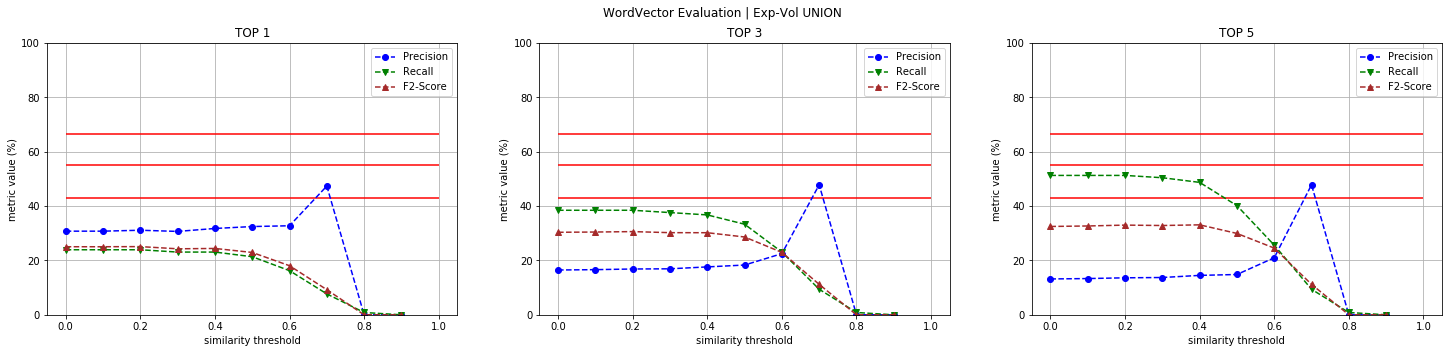

In [6]:
results_1 = evaluator_1.run_evaluator(models=[wv_model_1], top_values=[1,3,5], sim_thresholds=[(sm.SimilarityMeasure.COSINE, s_thresh/10) for s_thresh in range(0,10)])
evaluator_1.plot_evaluations_2(title='WordVector Evaluation | Exp-Vol UNION', results=results_1, model_name='cust_wordvector')

## Intersection Strategy

Expert and Volunteers Matrix INTERSEC.shape: (91, 19)
Evaluating CUST_WORDVECTOR Model ----- 


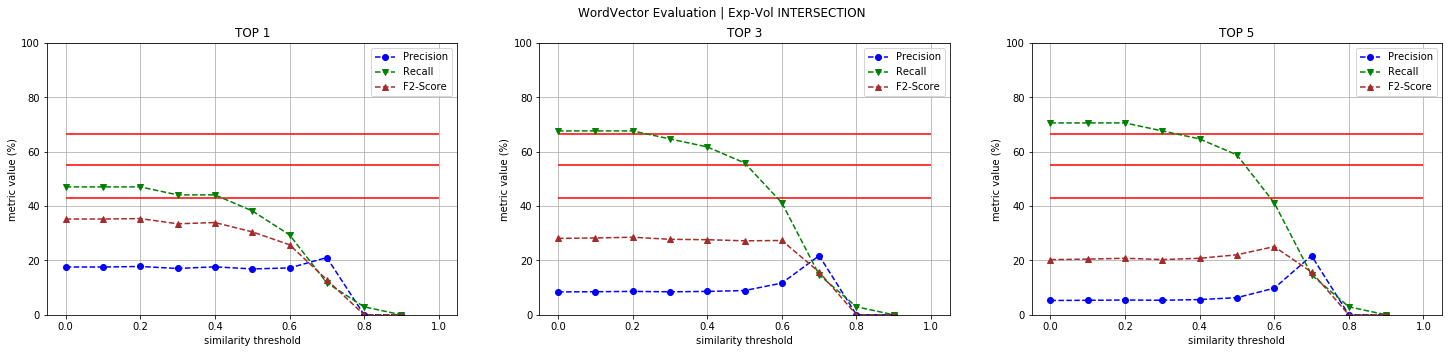

In [7]:
evaluator_2 = m_eval.ModelEvaluator(oracle=fd.Feat_BR_Oracles.read_feat_br_expert_volunteers_intersec_df().T)
results_2 = evaluator_2.run_evaluator(models=[wv_model_1], top_values=[1,3,5], sim_thresholds=[(sm.SimilarityMeasure.COSINE, s_thresh/10) for s_thresh in range(0,10)])
evaluator_2.plot_evaluations_2(title='WordVector Evaluation | Exp-Vol INTERSECTION', results=results_2, model_name='cust_wordvector')

## Expert-Only Strategy

Feat_BR Expert Matrix shape: (91, 19)
Evaluating CUST_WORDVECTOR Model ----- 


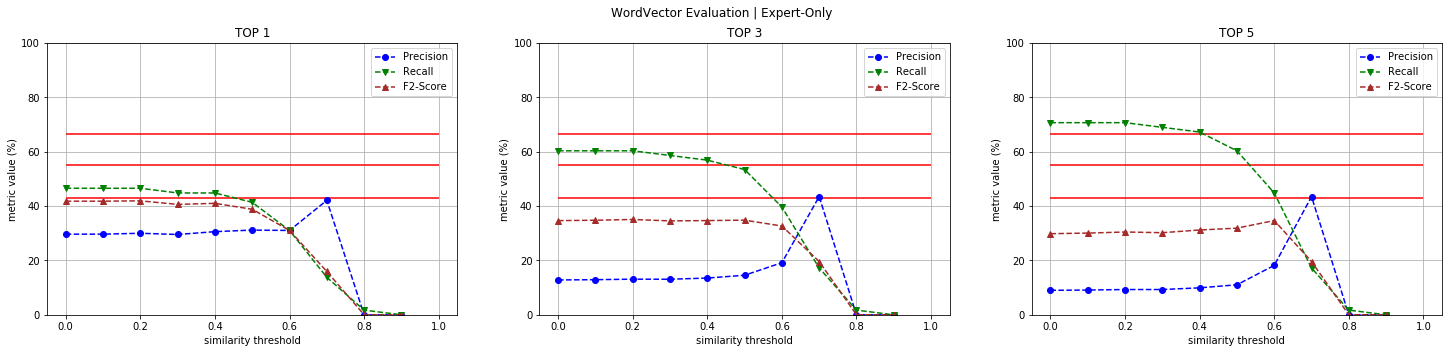

In [8]:
evaluator_3 = m_eval.ModelEvaluator(oracle=fd.Feat_BR_Oracles.read_feat_br_expert_df().T)
results_3 = evaluator_3.run_evaluator(models=[wv_model_1], top_values=[1,3,5], sim_thresholds=[(sm.SimilarityMeasure.COSINE, s_thresh/10) for s_thresh in range(0,10)])
evaluator_3.plot_evaluations_2(title='WordVector Evaluation | Expert-Only', results=results_3, model_name='cust_wordvector')

## Volunteers-Only Strategy

Feat_BR Volunteers Matrix shape: (91, 19)
Evaluating CUST_WORDVECTOR Model ----- 


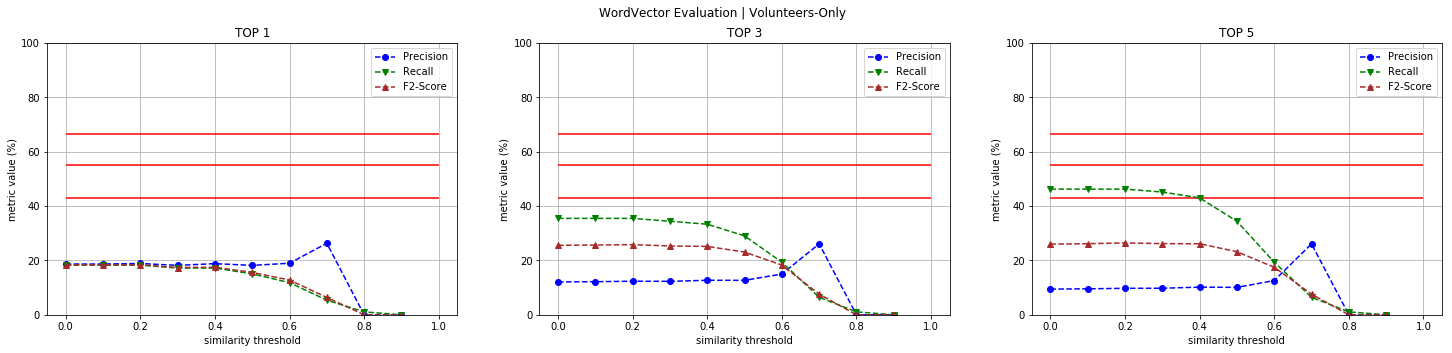

In [9]:
evaluator_4 = m_eval.ModelEvaluator(oracle=fd.Feat_BR_Oracles.read_feat_br_volunteers_df().T)
results_4 = evaluator_4.run_evaluator(models=[wv_model_1], top_values=[1,3,5], sim_thresholds=[(sm.SimilarityMeasure.COSINE, s_thresh/10) for s_thresh in range(0,10)])
evaluator_4.plot_evaluations_2(title='WordVector Evaluation | Volunteers-Only', results=results_4, model_name='cust_wordvector')

### Means of Metrics

Considering **TOP** values (1,3,5) and **SIMILARITY THRESHOLDS** values range(0.0,0.9)

In [10]:
print("Mean Precision: {:2.3}".format(np.mean(results_4.perc_precision)))
print("Mean Recall: {:2.3}".format(np.mean(results_4.perc_recall)))
print("Mean F-Score: {:2.3}".format(np.mean(results_4.perc_fscore)))

Mean Precision: 12.3
Mean Recall: 21.4
Mean F-Score: 16.0
